# Packages and imports

In [1]:
# System things
import os

# Data manipulation
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Read in raw data from both groups

In [2]:
# Data dictionary and mapping to update col headers
data_dict = pd.read_csv('../data/data_dictionary.csv')
col_dict = dict(zip(data_dict['raw_col_name'], data_dict['col_name']))
data_dict.head()

,raw_col_name,col_name,question_text,qualtrics_imoport_id,data_type,recode_values,allow_televisibility,allow_harm,no_allow_televisibility,no_allow_harm
0,StartDate,StartDate,Start Date,"{""ImportId"":""startDate"",""timeZone"":""America/De...",datetime,NaN,NaN,NaN,NaN,NaN
1,EndDate,EndDate,End Date,"{""ImportId"":""endDate"",""timeZone"":""America/Denv...",datetime,NaN,NaN,NaN,NaN,NaN
2,Status,Status,Response Type,"{""ImportId"":""status""}",str,NaN,NaN,NaN,NaN,NaN
3,IPAddress,IPAddress,IP Address,"{""ImportId"":""ipAddress""}",ip_address,NaN,NaN,NaN,NaN,NaN
4,Progress,Progress,Progress,"{""ImportId"":""progress""}",int,NaN,NaN,NaN,NaN,NaN


In [3]:
# Behavior Analyst data
bx_data = pd.read_csv('../data/01_raw/all_bxanalyst_data.csv')
bx_df = bx_data.copy()
bx_df.drop([0, 1], inplace=True)
bx_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Demographics 1,Demographics 1_6_TEXT,Demographics 2,Demographics 3,Demographics 4,Demographics 5,Demographics 5_6_TEXT,Demographics 6,Demographics 6_6_TEXT,Demographics 7,Demographics 7_5_TEXT,Demographics 8,Demographics 8_5_TEXT,Demographics 9,Demographics 9_3_TEXT,LT-A1,LT-A2,LT-A3,LT-A4,LT-A5,LT-A6,LT-A7,LT-A8,LT-A9,LT-A10,LT-A11,LT-A12,LT-A13,LT-A14,LT-A15,LT-A16,LT-A17,LT-A18,LT-A19,LT-A20,LT-A21,LT-A22,LT-A23,LT-A24,LT-A25,LT-A26,LT-A27,MT-A1,MT-A2,MT-A3,MT-A4,MT-A5,MT-A6,MT-A7,MT-A8,MT-A9,MT-A10,MT-A11,MT-A12,MT-A13,MT-A14,MT-A15,MT-A16,MT-A17,MT-A18,MT-A19,MT-A20,MT-A21,MT-A22,MT-A23,MT-A24,MT-A25,MT-A26,MT-A27,HT-A1,HT-A2,HT-A3,HT-A4,HT-A5,HT-A6,HT-A7,HT-A8,HT-A9,HT-A10,HT-A11,HT-A12,HT-A13,HT-A14,HT-A15,HT-A16,HT-A17,HT-A18,HT-A19,HT-A20,HT-A21,HT-A22,HT-A23,HT-A24,HT-A25,HT-A26,HT-A27,F1,F2,F3,F4,F6,F7
2,2022-03-01 09:40:41,2022-03-01 09:54:04,0,73.248.42.50,100,803,1,2022-03-01 09:54:05,R_2w6NcI6Jrx51rF1,NaN,NaN,NaN,NaN,39.9662933349609375,-74.810302734375,anonymous,EN,2,NaN,12/31/2004,23,41,1,NaN,2,NaN,3,NaN,"2,3,4",NaN,"1,2,3",Organizations/businesses,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,I think we need to look at everything we do as...,I have had extensive experience. I felt like I...,NaN,Christen Russell,crussell@endicott.edu
3,2022-03-02 12:56:47,2022-03-02 13:11:22,0,98.35.23.249,100,875,1,2022-03-02 13:11:23,R_u4UBRJcTeUC1yPT,NaN,NaN,NaN,NaN,37.9835968017578125,-122.01629638671875,anonymous,EN,2,NaN,06/01/2015,9,34,1,NaN,1,NaN,5,Data,"1,2,3,4",NaN,"1,2",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,New York Times test,Very experienced in functional analysis of pro...,NaN,Jake Sosine,Jacobsosine@gmail.com
4,2022-03-05 08:16:01,2022-03-05 08:24:01,0,192.210.17.121,100,480,1,2022-03-05 08:24:02,R_25Kjw8pvt3nUO7o,NaN,NaN,NaN,NaN,37.4073028564453125,-121.938995361328125,anonymous,EN,1,NaN,09/01/2011,8,36,1,NaN,1,NaN,NaN,NaN,NaN,NaN,3,NaN,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,NaN,New to me with this study.,"""Allowing"" is a difficult word. But, to the ex...",NaN,NaN,NaN
5,2022-03-05 11:38:56,2022-03-05 11:48:36,0,67.255.56.162,100,580,1,2022-03-05 11:48:36,R_cZaE8YMWB2XuGxb,NaN,NaN,NaN,NaN,44.0514984130859375,-70.729400634765625,anonymous,EN,2,NaN,11/30/2016,10,34,1,NaN,2,NaN,4,NaN,4,NaN,2,NaN,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,I frequently hear it in presentations and scho...,I have a lot of experience in this area workin...,NaN,Natalie,ndriscol@endicott.edu
6,2022-03-01 04:41:52,2022-03-01 05:05:50,0,76.118.68.216,38,1437,0,2022-03-08 05:05:56,R_2dQpZRWFJZK4eD0,NaN,NaN,NaN,NaN,NaN,NaN,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Gen Pop Data
gp_data = pd.read_csv('../data/01_raw/all_genpop_data.csv')
gp_df = gp_data.copy()
gp_df.drop([0, 1], inplace=True)
gp_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Demographics 1,Demographics 1_6_TEXT,Demographics 2,Demographics 3,Demographics 4,Demographics 5,Demographics 5_6_TEXT,Demographics 6,Demographics 6_6_TEXT,Demographics 7,Demographics 7_5_TEXT,Demographics 8,Demographics 8_5_TEXT,Demographics 9,Demographics 9_3_TEXT,LT-A1,LT-A2,LT-A3,LT-A4,LT-A5,LT-A6,LT-A7,LT-A8,LT-A9,LT-A10,LT-A11,LT-A12,LT-A13,LT-A14,LT-A15,LT-A16,LT-A17,LT-A18,LT-A19,LT-A20,LT-A21,LT-A22,LT-A23,LT-A24,LT-A25,LT-A26,LT-A27,MT-A1,MT-A2,MT-A3,MT-A4,MT-A5,MT-A6,MT-A7,MT-A8,MT-A9,MT-A10,MT-A11,MT-A12,MT-A13,MT-A14,MT-A15,MT-A16,MT-A17,MT-A18,MT-A19,MT-A20,MT-A21,MT-A22,MT-A23,MT-A24,MT-A25,MT-A26,MT-A27,HT-A1,HT-A2,HT-A3,HT-A4,HT-A5,HT-A6,HT-A7,HT-A8,HT-A9,HT-A10,HT-A11,HT-A12,HT-A13,HT-A14,HT-A15,HT-A16,HT-A17,HT-A18,HT-A19,HT-A20,HT-A21,HT-A22,HT-A23,HT-A24,HT-A25,HT-A26,HT-A27,F1,F2,F3,F4,F6,F7
2,6/18/22 11:47,6/18/22 11:53,0,162.239.233.12,100,361,1,6/18/22 11:53,R_1n9EJY6RPPmPXcD,NaN,NaN,NaN,NaN,32.5505,-83.6044,anonymous,EN,5,NaN,NaN,0,25,2,NaN,2,NaN,2,NaN,4,NaN,1,NaN,2,2,1,2,2,1,2,1,2,2,2,1,2,1,2,2,1,1,2,2,1,2,2,2,1,2,2,1,2,1,2,2,2,1,1,1,2,2,1,2,2,1,1,1,1,2,2,1,1,2,1,2,2,1,1,1,2,2,1,2,2,2,1,1,2,1,2,2,2,1,2,1,1,2,2,2,1,2,1,2,1,I compared probability but tried to defect to ...,I have some experience with the term,some unhealthy behavior is allowed in moderation,none,NaN,NaN
3,6/18/22 11:48,6/18/22 11:56,0,172.58.56.129,100,481,1,6/18/22 11:56,R_3G2gh0rc9RttJ1N,NaN,NaN,NaN,NaN,39.0847,-94.5308,anonymous,EN,6,NaN,NaN,0,40,2,NaN,2,NaN,2,NaN,"2,3,4",NaN,"1,3",NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,Jus the risk level was something I kept Kim mi...,I don’t have much experience with the term.,My experience is very low for this.,No.,NaN,NaN
4,6/18/22 11:52,6/18/22 12:00,0,73.53.139.200,100,476,1,6/18/22 12:00,R_1gHCuKRpyugis8D,NaN,NaN,NaN,NaN,30.3524,-81.5867,anonymous,EN,5,NaN,NaN,0,40,1,NaN,1,NaN,5,Office,4,NaN,3,Office Workers,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,I think that it's important to be consistent. ...,I don't have experience with televisibility bu...,I have no experience with that,NaN,NaN,NaN
5,6/18/22 12:08,6/18/22 12:16,0,172.58.111.25,100,462,1,6/18/22 12:16,R_1Nky7fMRmYbImUR,NaN,NaN,NaN,NaN,32.7836,-96.8674,anonymous,EN,6,DATA ANALYST,NaN,0,36,1,NaN,2,NaN,2,NaN,"3,4",NaN,3,NONE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Who am I to decide what someone eats. It is a ...,I have never heard of this.,None,None,SD,none@aol.com
6,6/18/22 12:01,6/18/22 12:23,0,71.185.255.225,100,1364,1,6/18/22 12:23,R_NUzYBtTiVWEaBYR,NaN,NaN,NaN,NaN,40.185,-75.0041,anonymous,EN,6,Special Education Teacher,NaN,1,31,1,NaN,2,NaN,3,NaN,3,NaN,"1,2",NaN,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,my decisions were based on the level of short-...,i’ve had students who would post to social med...,i’m always trying to avoid having clients enga...,nope. thanks!,Danielle Cappa,dmcappa@gmail.com


# Tidy up and merge datasets

In [5]:
# Rename cols, add col to specify source
bx_df.columns = data_dict['col_name']
bx_df['source'] = 'bx_analyst'
gp_df.columns = data_dict['col_name']
gp_df['source'] = 'gen_pop'

In [6]:
# Merge into single df
all_data = pd.concat([bx_df, gp_df]).reset_index(drop=True)
all_data.reset_index(drop=True, inplace=True)
all_data

col_name,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,credential,credential_other,date_certified,years_experience_aba,age,race_identify,race_identify_other,gender,gender_other,work_setting,work_setting_other,client_ages,client_ages_other,populations_work,populations_work_other,low_low_low_low,low_low_med_low,low_low_high_low,low_low_low_med,low_low_med_med,low_low_high_med,low_low_low_high,low_low_med_high,low_low_high_high,low_med_low_low,low_med_med_low,low_med_high_low,low_med_low_med,low_med_med_med,low_med_high_med,low_med_low_high,low_med_med_high,low_med_high_high,low_high_low_low,low_high_med_low,low_high_high_low,low_high_low_med,low_high_med_med,low_high_high_med,low_high_low_high,low_high_med_high,low_high_high_high,low_low_low_low,med_low_med_low,med_low_high_low,med_low_low_med,med_low_med_med,med_low_high_med,med_low_low_high,med_low_med_high,med_low_high_high,med_med_low_low,med_med_med_low,med_med_high_low,med_med_low_med,med_med_med_med,med_med_high_med,med_med_low_high,med_med_med_high,med_med_high_high,med_high_low_low,med_high_med_low,med_high_high_low,med_high_low_med,med_high_med_med,med_high_high_med,med_high_low_high,med_high_med_high,med_high_high_high,high_low_low_low,high_low_med_low,high_low_high_low,high_low_low_med,high_low_med_med,high_low_high_med,high_low_low_high,high_low_med_high,high_low_high_high,high_med_low_low,high_med_med_low,high_med_high_low,high_med_low_med,high_med_med_med,high_med_high_med,high_med_low_high,high_med_med_high,high_med_high_high,high_high_low_low,high_high_med_low,high_high_high_low,high_high_low_med,high_high_med_med,high_high_high_med,high_high_low_high,high_high_med_high,high_high_high_high,strategy_used,experience_televisibility,experience_clients_harm,feedback,name,email,source
0,2022-03-01 09:40:41,2022-03-01 09:54:04,0,73.248.42.50,100,803,1,2022-03-01 09:54:05,R_2w6NcI6Jrx51rF1,NaN,NaN,NaN,NaN,39.9662933349609375,-74.810302734375,anonymous,EN,2,NaN,12/31/2004,23,41,1,NaN,2,NaN,3,NaN,"2,3,4",NaN,"1,2,3",Organizations/businesses,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,I think we need to look at everything we do as...,I have had extensive experience. I felt like I...,NaN,Christen Russell,crussell@endicott.edu,bx_analyst
1,2022-03-02 12:56:47,2022-03-02 13:11:22,0,98.35.23.249,100,875,1,2022-03-02 13:11:23,R_u4UBRJcTeUC1yPT,NaN,NaN,NaN,NaN,37.9835968017578125,-122.01629638671875,anonymous,EN,2,NaN,06/01/2015,9,34,1,NaN,1,NaN,5,Data,"1,2,3,4",NaN,"1,2",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,New York Times test,Very experienced in functional analysis of pro...,NaN,Jake Sosine,Jacobsosine@gmail.com,bx_analyst
2,2022-03-05 08:16:01,2022-03-05 08:24:01,0,192.210.17.121,100,480,1,2022-03-05 08:24:02,R_25Kjw8pvt3nUO7o,NaN,NaN,NaN,NaN,37.4073028564453125,-121.938995361328125,anonymous,EN,1,NaN,09/01/2011,8,36,1,NaN,1,NaN,NaN,NaN,NaN,NaN,3,NaN,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,1,1,1,NaN,New to me with this study.,"""Allowing"" is a difficult word. But, to the ex...",NaN,NaN,NaN,bx_analyst
3,2022-03-05 11:38:56,2022-03-05 11:48:36,0,67.255.56.162,100,580,1,2022-03-05 11:48:36,R_cZaE8YMWB2XuGxb,NaN,NaN,NaN,NaN,44.0514984130859375,-70.729400634765625,anonymous,EN,2,NaN,11/30/2016,10,34,1,NaN,2,NaN,4,NaN,4,NaN,2,NaN,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,I frequently hear it in presentatio

In [7]:
all_data.isna().sum().reset_index()

,col_name,0
0,StartDate,0
1,EndDate,0
2,Status,0
3,IPAddress,0
4,Progress,0
...,...,...
115,experience_clients_harm,24
116,feedback,41
117,name,45
118,email,45


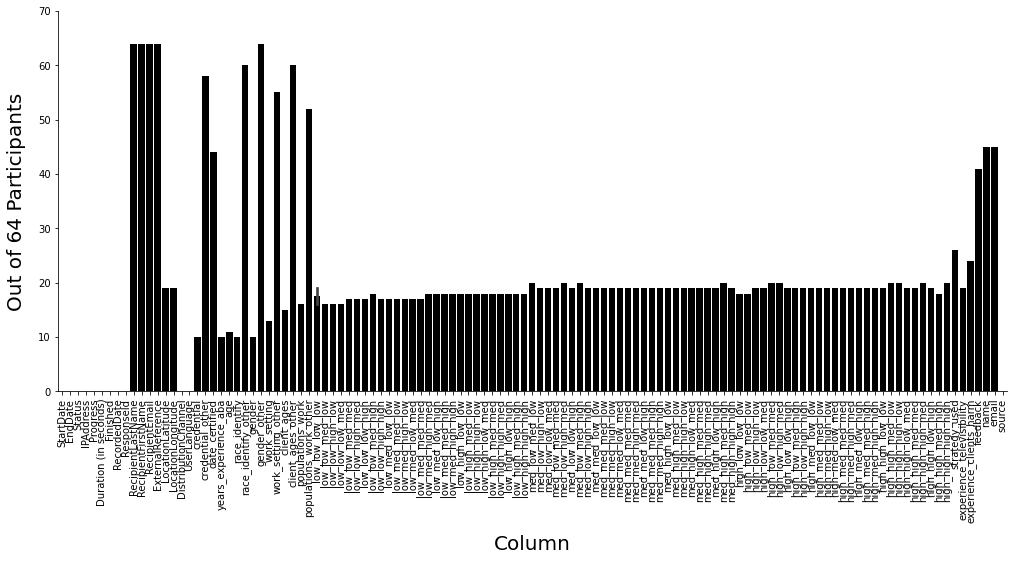

In [8]:
# Quick plot of missing data per question
missing = all_data.isna().sum().reset_index()
missing.columns = ['col', 'missing']
fig, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x='col', y='missing', data = missing, color='k')
plt.ylabel(f"Out of {len(all_data)} Participants", labelpad=12, fontsize=20)
plt.ylim(0, 70)
plt.xticks(rotation=90)
plt.xlabel("Column", labelpad=12, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

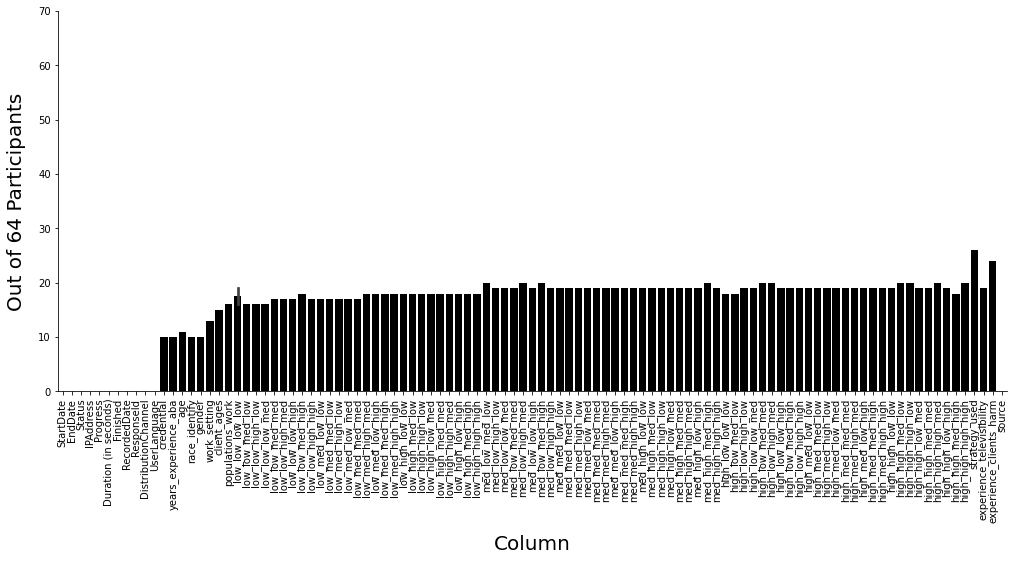

In [9]:
# Remove cols that appear they will not be helpful
drop_cols = [val for val in list(all_data) if ("Recipient" in val) or 
             ("External" in val) or 
             ("Location" in val) or 
             ("_other" in val) or 
             ("certified" in val) or 
             (val=='feedback') or 
             (val=='name') or 
             (val=='email')]
all_data = all_data.drop(drop_cols, axis=1)

# Replot
missing = all_data.isna().sum().reset_index()
missing.columns = ['col', 'missing']
fig, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x='col', y='missing', data = missing, color='k')
plt.ylabel(f"Out of {len(all_data)} Participants", labelpad=12, fontsize=20)
plt.ylim(0, 70)
plt.xticks(rotation=90)
plt.xlabel("Column", labelpad=12, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

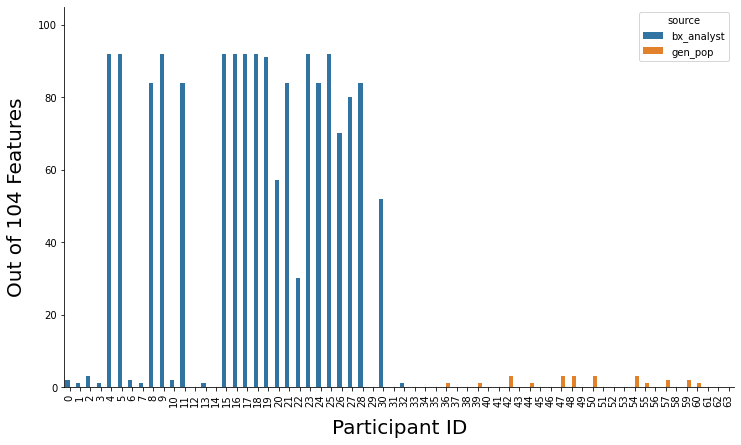

20 = the number of participants with more than 20 missing fields


In [10]:
# Quick plot of how much data is missing for each row
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=all_data.index, y=all_data.isna().sum(axis=1), hue=all_data['source'])
plt.ylabel(f"Out of {len(list(all_data))} Features", labelpad=12, fontsize=20)
plt.ylim(0, 105)
plt.xticks(rotation=90)
plt.xlabel("Participant ID", labelpad=12, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

print(f"{(all_data.isna().sum(axis=1) > 20).sum()} = the number of participants with more than 20 missing fields")

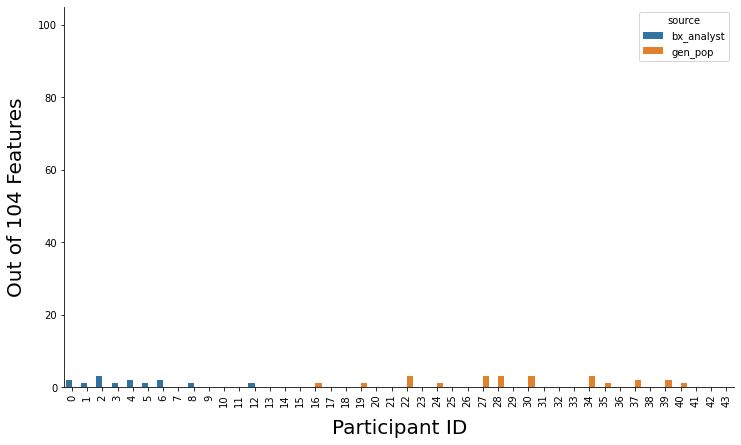

0 = the number of participants with more than 20 missing fields


In [11]:
# Drop those missing more than 20 columns of data
all_data = all_data.dropna(thresh=(len(list(all_data))-20)).reset_index(drop=True)

# Replot
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=all_data.index, y=all_data.isna().sum(axis=1), hue=all_data['source'])
plt.ylabel(f"Out of {len(list(all_data))} Features", labelpad=12, fontsize=20)
plt.ylim(0, 105)
plt.xticks(rotation=90)
plt.xlabel("Participant ID", labelpad=12, fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

print(f"{(all_data.isna().sum(axis=1) > 20).sum()} = the number of participants with more than 20 missing fields")

In [12]:
# Save it
all_data.to_csv('../data/03_analytic/clean_data.csv')